# Quelques références 


*   Généralités sur les SVM :
> *   Introduction au Machine Learning (Chloé-Agathe Azencott) - Chap 10
* Numpy efficace 
> * [intro Numpy - S. Raschka](https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf)
> *[Look Ma, no for-loops](https://realpython.com/numpy-array-programming/)
* Pandas \& Matplotlib
> * [Manipulation de données](https://pandas.pydata.org/pandas-docs/stable/10min.html)
> * [Représentation des données et figures](http://matplotlib.org/users/beginner.html)

## Apprentissage sur la base Iris - limite du perceptron

Pour tester la classe implémentée précédemment, on va charger le jeu de données Iris (en se restreignant à deux classes et deux variables).
Cette fois, on utilise deux classes qui se recouvrent partiellement.

Le code pour charger et afficher ces données est fourni ici.

1.   Au vue de la Figure affichée, peut-on espérer que la règle du perceptron converge ? 
2.   Créer un objet de type Perceptron (de la libraire scikit-learn) et appliquer la fonction fit et afficher la frontière de décision d'un classifieur entraîné.


*Remarque * relancer le code en changeant le graine du générateur aléatoire (donné en paramètre du perceptron) et observer la variabilité de la solution. (On comprends alors l'intérêt de fixer la graine d'un générateur pseudo-aléatoire pour la reproductibilité).


In [1]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


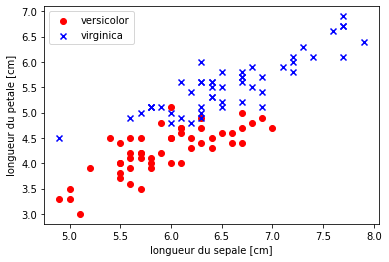

In [2]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

# selectionn de setosa et versicolor
y = df.iloc[50:150, 4].values

# precedemment, on s'interessait à deux autres classes
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == 'Iris-versicolor', -1, 1)

# extraction de la longueur du sepale length et de la longueur du petale
X = df.iloc[50:150, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('longueur du sepale [cm]')
plt.ylabel('longueur du petale [cm]')
plt.legend(loc='upper left')

plt.show()

In [3]:
## création d'un perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(tol=1 , random_state = 3)

In [4]:
# entrainez le perceptron
# Train the model 
ppn.fit(X,y)

Perceptron(random_state=3, tol=1)

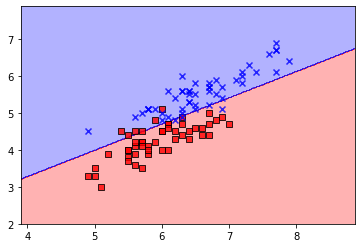

In [5]:
# affichez la frontière de décision
plot_decision_regions(X,y,ppn)

## Apprentissage sur la base Iris - cas du SVM
1. Appliquer un SVM linéaire sur ces données et afficher la frontière de décision.
3. Créer une fonction 'accuracy' qui prend en entrée un jeu de données et un classifieur, et qui retourne la précision du classifieur (# d'entrées bien classifiées / # total d'entrées)
4. Utiliser la fonction accuracy pour retourner la valeur de C la meilleure pour le jeu de données.
5. Comparez avec l'accuracy du perceptron.
6. Comparez les temps de calcul des deux méthodes

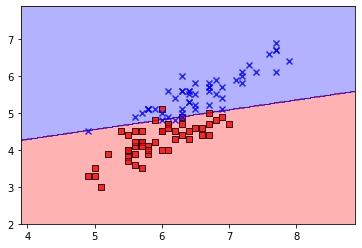

In [6]:
from sklearn.svm import SVC
svc = SVC(C=20,kernel='linear')
# Train SVC
svc.fit(X,y)
# plot decision boundry 
plot_decision_regions(X,y,svc)

## Apprentissage sur données générées par sklearn

1. Génerez et représentez lenuage de points correspondant au jeu de données généré par la fonction make_circles.
2. Entrainez un perceptron et un SVM linéaire sur les données générées, et retournez leurs précisions avec la méthode accuracy.
.

In [7]:
import time
# Accuracy function 

def accuracy(X,y,classifier):
    return (y == classifier.fit(X,y).predict(X)).sum() / y.shape[0]

# train perceptron 
tic = time.time()
ppn.fit(X,y)
print(f'Perceptron score : {accuracy(X,y,ppn)}')
toc = time.time()
print(f'Ellapsed time [PPN]: {toc-tic}')

# train svm 
tic = time.time()
svc.fit(X,y)
print(f'SVM score : {accuracy(X,y,svc)}')
toc = time.time()
print(f'Ellapsed time [SVM]: {toc-tic}')

Perceptron score : 0.91
Ellapsed time [PPN]: 0.002524852752685547
SVM score : 0.93
Ellapsed time [SVM]: 0.0013871192932128906


In [8]:
# Find best accuracy 

cs = [1e-5,1e-4,5e-2,1,2,3,5,10,20,100]
accuracies_svm = [accuracy(X,y,SVC(kernel='linear',C=c_i)) for c_i in cs]
print(f'[SVM] accuracy : {accuracies_svm}')
accuracies_ppn = [accuracy(X,y,Perceptron(random_state=i)) for i in range(10)]
print(f'[PPN] accuracy : {accuracies_ppn}')


[SVM] accuracy : [0.83, 0.83, 0.91, 0.93, 0.94, 0.95, 0.94, 0.95, 0.93, 0.95]
[PPN] accuracy : [0.8, 0.91, 0.73, 0.92, 0.55, 0.91, 0.88, 0.8, 0.55, 0.65]


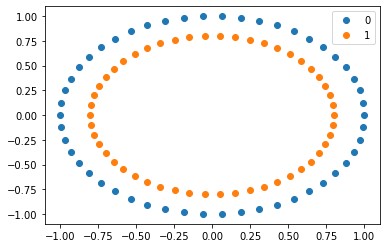

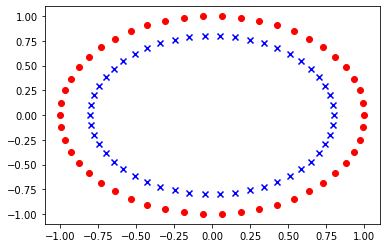

In [9]:
from sklearn.datasets import make_circles
import pandas as pd

X,y=make_circles()

# Méthode 01 :
# Repésentez le nuage de points du jeu de données
data = pd.DataFrame({"longeur_sepal": X[:,0],"largeur_sepal":X[:,1], "y": y})
groups = data.groupby("y")
for name, group in groups:
    plt.plot(group["longeur_sepal"], group["largeur_sepal"], marker="o", linestyle="", label=name)
plt.legend()
plt.show()

# Méthode 02 :
# Repésentez le nuage de points du jeu de données
plt.clf()
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='red',marker='o')
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='blue',marker='x')
plt.show()






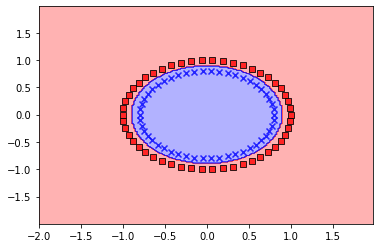

In [10]:
# Entrainez les deux classifieurs sur le jeu de données en retournez leurs accuracy 
# (spoiler alert : les classifieurs ne marchent pas du tout !)
# Init model 
svc = SVC()
# Train SVC
svc.fit(X,y)


# plot decision boundry 
plot_decision_regions(X,y,svc)


